In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Tạo thư mục để lưu các biểu đồ nếu chưa tồn tại
PLOTS_DIR = 'plots'
os.makedirs(PLOTS_DIR, exist_ok=True)
print(f"Thư mục '{PLOTS_DIR}' đã sẵn sàng để lưu biểu đồ.")
# Cài đặt cấu hình chung cho các biểu đồ
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12
# Tải dữ liệu vào DataFrame
try:
    df = pd.read_csv('generated_student_data_v2.csv')
    print("Tải dữ liệu thành công!")
    print("5 dòng dữ liệu đầu tiên:")
    display(df.head())
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'generated_student_data_v2.csv'.")
    df = None

Thư mục 'plots' đã sẵn sàng để lưu biểu đồ.
Tải dữ liệu thành công!
5 dòng dữ liệu đầu tiên:


,Mã SV,Kỳ,Kỳ số,Năm,Mã Môn,Tên Môn,Hình Thức,Số ĐVHT,Loại ĐVHT,Điểm gốc,...,Điểm tích lũy (môn),GPA Kỳ Hiện Tại,GPA Tích Lũy (sau kỳ này),Số môn trước đó,Tín chỉ tích lũy trước đó,Thời Gian Học Một Tuần,Trình Trạng Chuyên Cần,Thời Gian Từ Nhà Đến Trường,Hỗ Trợ Từ Gia Đình,Xung Đột Dữ Liệu
0,SV0001,Học Kỳ I - Năm Học 2022-2023,1,2022-2023,CMU-SE 100,Introduction to Software Engineering,LEC,3,Tín Chỉ,7.2,...,9.00,3.0,3.0,0,0,6,90%,57,Rất Cao,Không
1,SV0001,Học Kỳ I - Năm Học 2022-2023,1,2022-2023,CS 201,Tin Học Ứng Dụng,LEC,2,Tín Chỉ,8.7,...,8.00,3.0,3.0,0,0,16,80%,5,Rất Cao,Không
2,SV0001,Học Kỳ I - Năm Học 2022-2023,1,2022-2023,CS 201,Tin Học Ứng Dụng,LAB,1,Tín Chỉ,9.1,...,4.00,3.0,3.0,0,0,16,100%,22,Rất Cao,Không
3,SV0001,Học Kỳ I - Năm Học 2022-2023,1,2022-2023,CS 211,Lập Trình Cơ Sở,LEC,3,Tín Chỉ,5.3,...,4.95,3.0,3.0,0,0,11,50%,53,Rất Cao,Không
4,SV0001,Học Kỳ I - Năm Học 2022-2023,1,2022-2023,CS 211,Lập Trình Cơ Sở,LAB,1,Tín Chỉ,8.1,...,3.65,3.0,3.0,0,0,5,100%,9,Rất Cao,Không


In [15]:
if df is not None:
    # Sơ đồ ánh xạ từ tên cột tiếng Việt sang tiếng Anh (snake_case)
    # Đây là danh sách cột cuối cùng chúng ta muốn giữ lại và phân tích
    column_mapping = {
        'Mã SV':'student_id',
        'Năm': 'year',
        'Kỳ số': 'semester_number',
        'Mã Môn': 'course_code',
        'Hình Thức': 'study_format',
        'Số ĐVHT': 'credits_unit',
        'Điểm gốc': 'raw_score',
        'GPA Kỳ Hiện Tại': 'current_semester_gpa',
        'GPA Tích Lũy (sau kỳ này)': 'cumulative_gpa',
        'Số môn trước đó': 'previous_courses_taken',
        'Tín chỉ tích lũy trước đó': 'previous_credits_earned',
        'Thời Gian Học Một Tuần': 'weekly_study_hours',
        'Trình Trạng Chuyên Cần': 'attendance_percentage',
        'Thời Gian Từ Nhà Đến Trường': 'commute_time_minutes',
        'Hỗ Trợ Từ Gia Đình': 'family_support'
    }
    
    # Lấy danh sách các cột gốc cần giữ lại
    original_columns_to_keep = list(column_mapping.keys())
    
    # Lọc DataFrame để chỉ giữ lại các cột này
    df_processed = df[original_columns_to_keep].copy()
    
    # Đổi tên các cột đã được lọc
    df_processed.rename(columns=column_mapping, inplace=True)
    
    print("Đã chọn và đổi tên các cột cần thiết. Các cột trong DataFrame mới:")
    print(df_processed.columns.tolist())
#Loại bỏ dòng không hợp lệ
if df is not None:
    initial_rows = len(df_processed)
    
    # Lọc bỏ các dòng có 'course_code' bắt đầu bằng 'ES' (không phân biệt hoa/thường)
    df_processed = df_processed[~df_processed['course_code'].str.strip().str.upper().str.startswith('ES')]
    
    final_rows = len(df_processed)
    print(f"Đã lọc bỏ {initial_rows - final_rows} bản ghi có mã môn bắt đầu bằng 'ES'.")
if df is not None:
    print("Kiểu dữ liệu ban đầu:")
    print(df_processed.dtypes)
    
    # Chuyển đổi cột phần trăm từ string (object) sang float
    if 'attendance_percentage' in df_processed.columns and df_processed['attendance_percentage'].dtype == 'object':
        df_processed['attendance_percentage'] = df_processed['attendance_percentage'].str.replace('%', '', regex=False).astype(float)
    
    # Chuyển đổi các cột số khác nếu cần, xử lý lỗi nếu có giá trị không phải số
    # **ĐÃ LOẠI BỎ 'year' và 'semester_number' KHỎI DANH SÁCH NÀY**
    numeric_cols = [
        'raw_score', 'credits',
        'current_semester_gpa', 'cumulative_gpa', 'previous_courses_taken',
        'previous_credits_earned', 'weekly_study_hours', 'commute_time_minutes'
    ]
    for col in numeric_cols:
        if col in df_processed.columns:
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

    print("\nKiểu dữ liệu sau khi chuyển đổi:")
    # Chuyển các cột này thành kiểu 'category' để tối ưu bộ nhớ và thể hiện đúng bản chất
    df_processed['year'] = df_processed['year'].astype('category')
    df_processed['semester_number'] = df_processed['semester_number'].astype('category')
    df_processed['student_id'] = df_processed['student_id'].astype('category')
    print(df_processed.dtypes)
#xử lý giá trị thiếu
if df is not None:
    print("Số lượng giá trị thiếu mỗi cột:")
    print(df_processed.isnull().sum())
    
    # Xóa các hàng chứa bất kỳ giá trị thiếu nào
    rows_before_na_drop = len(df_processed)
    df_processed.dropna(inplace=True)
    rows_after_na_drop = len(df_processed)
    
    print(f"\nĐã xóa {rows_before_na_drop - rows_after_na_drop} hàng có giá trị thiếu.")

Đã chọn và đổi tên các cột cần thiết. Các cột trong DataFrame mới:
['student_id', 'year', 'semester_number', 'course_code', 'study_format', 'credits_unit', 'raw_score', 'current_semester_gpa', 'cumulative_gpa', 'previous_courses_taken', 'previous_credits_earned', 'weekly_study_hours', 'attendance_percentage', 'commute_time_minutes', 'family_support']
Đã lọc bỏ 25000 bản ghi có mã môn bắt đầu bằng 'ES'.
Kiểu dữ liệu ban đầu:
student_id                  object
year                        object
semester_number             object
course_code                 object
study_format                object
credits_unit                 int64
raw_score                  float64
current_semester_gpa       float64
cumulative_gpa             float64
previous_courses_taken       int64
previous_credits_earned      int64
weekly_study_hours           int64
attendance_percentage       object
commute_time_minutes         int64
family_support              object
dtype: object

Kiểu dữ liệu sau khi chuyển đổi:

In [16]:
if df is not None:
    # -- SỬA LỖI: Chuẩn hóa dữ liệu về chữ thường (lowercase) và loại bỏ khoảng trắng --
    # Chuyển cột về kiểu string, strip() khoảng trắng, và lower() để đưa về chữ thường
    df_processed['semester_number'] = df_processed['semester_number'].astype(str).str.strip().str.lower()
    df_processed['family_support'] = df_processed['family_support'].astype(str).str.strip().str.lower()

    # Tạo các từ điển ánh xạ với key (khóa) cũng là chữ thường để đảm bảo khớp
    semester_mapping = {'1': 1, '2': 2, 'hè': 3}
    support_mapping = {'thấp': 0, 'trung bình': 1, 'cao': 2, 'rất cao': 3}

    # Áp dụng mapping cho các cột đã được chuẩn hóa
    df_processed['semester_number'] = df_processed['semester_number'].map(semester_mapping)
    df_processed['family_support'] = df_processed['family_support'].map(support_mapping)
    
    # Kiểm tra lại một lần cuối nếu vẫn còn NaN sau khi map
    if df_processed['family_support'].isnull().any():
        print("CẢNH BÁO: Vẫn còn giá trị NaN trong cột 'family_support' sau khi mã hóa.")
        print("Điều này có nghĩa là trong dữ liệu có những từ khác ngoài 'thấp', 'trung bình', 'cao', 'rất cao'.")
        print("Vui lòng chạy lại khối code gỡ lỗi ở trên để tìm ra các từ đó.")
    else:
        print("Đã mã hóa thành công các biến phân loại.")

    print("\nKiểm tra 5 dòng đầu của các cột đã chuyển đổi:")
    display(df_processed[['semester_number', 'family_support']].head())

    print("\nKiểu dữ liệu sau khi mã hóa:")
    print(df_processed[['semester_number', 'family_support']].dtypes)

Đã mã hóa thành công các biến phân loại.

Kiểm tra 5 dòng đầu của các cột đã chuyển đổi:


,semester_number,family_support
0,1,3
1,1,3
2,1,3
3,1,3
4,1,3



Kiểu dữ liệu sau khi mã hóa:
semester_number    int64
family_support     int64
dtype: object


In [17]:
if df is not None:
    # Chọn các cột số để tính tương quan
    numeric_cols = df_processed.select_dtypes(include=np.number).columns
    correlation_matrix = df_processed[numeric_cols].corr()
    
    print("Ma trận tương quan Pearson:")
    display(correlation_matrix)

Ma trận tương quan Pearson:


,semester_number,credits_unit,raw_score,current_semester_gpa,cumulative_gpa,previous_courses_taken,previous_credits_earned,weekly_study_hours,attendance_percentage,commute_time_minutes,family_support
semester_number,1.000000,-0.227999,0.000824,0.003236,0.002117,0.374713,0.396823,0.001902,0.001038,-0.000489,-0.003175
credits_unit,-0.227999,1.000000,-0.003602,-0.001522,0.001109,0.160408,0.154750,-0.000466,-0.003705,-0.000008,-0.000609
raw_score,0.000824,-0.003602,1.000000,0.437994,0.306283,0.001021,0.004236,0.468562,0.783300,-0.183420,0.297840
current_semester_gpa,0.003236,-0.001522,0.437994,1.000000,0.685751,0.002516,0.009018,0.130480,0.223029,-0.049110,0.597576
cumulative_gpa,0.002117,0.001109,0.306283,0.685751,1.000000,0.008202,0.032629,0.066024,0.110906,-0.024958,0.585810
previous_courses_taken,0.374713,0.160408,0.001021,0.002516,0.008202,1.000000,0.996463,0.000961,0.001922,-0.001970,-0.003481
previous_credits_earned,0.396823,0.154750,0.004236,0.009018,0.032629,0.996463,1.000000,0.000738,0.001590,-0.001740,0.008100
weekly_study_hours,0.001902,-0.000466,0.468562,0.130480,0.066024,0.000961,0.000738,1.000000,-0.001949,-0.000602,0.002003
attendance_percentage,0.001038,-0.003705,0.783300,0.223029,0.110906,0.001922,0.001590,-0.001949,1.000000,0.000064,-0.002202
commute_time_minutes,-0.000489,-0.000008,-0.183420,-0.049110,-0.024958,-0.001970,-0.001740,-0.000602,0.000064,1.000000,-0.002497


Đã lưu biểu đồ vào: plots\distribution_raw_score.png


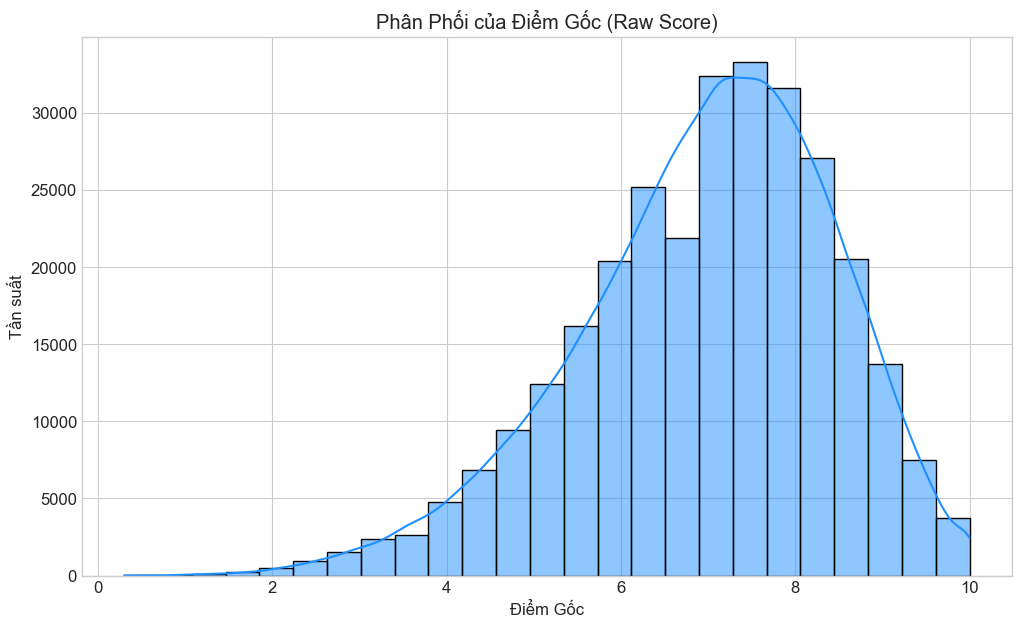

In [18]:
if df is not None:
    plt.figure(figsize=(12, 7))
    sns.histplot(df_processed['raw_score'], kde=True,color='dodgerblue',bins=25)
    plt.title('Phân Phối của Điểm Gốc (Raw Score)')
    plt.xlabel('Điểm Gốc')
    plt.ylabel('Tần suất')
    
    # --- LƯU BIỂU ĐỒ ---
    filename = 'distribution_raw_score.png'
    filepath = os.path.join(PLOTS_DIR, filename)
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    print(f"Đã lưu biểu đồ vào: {filepath}")
    # --- HIỂN THỊ BIỂU ĐỒ ---
    plt.show()

Đã lưu biểu đồ vào: plots\scatter_gpa_vs_study_hours.png


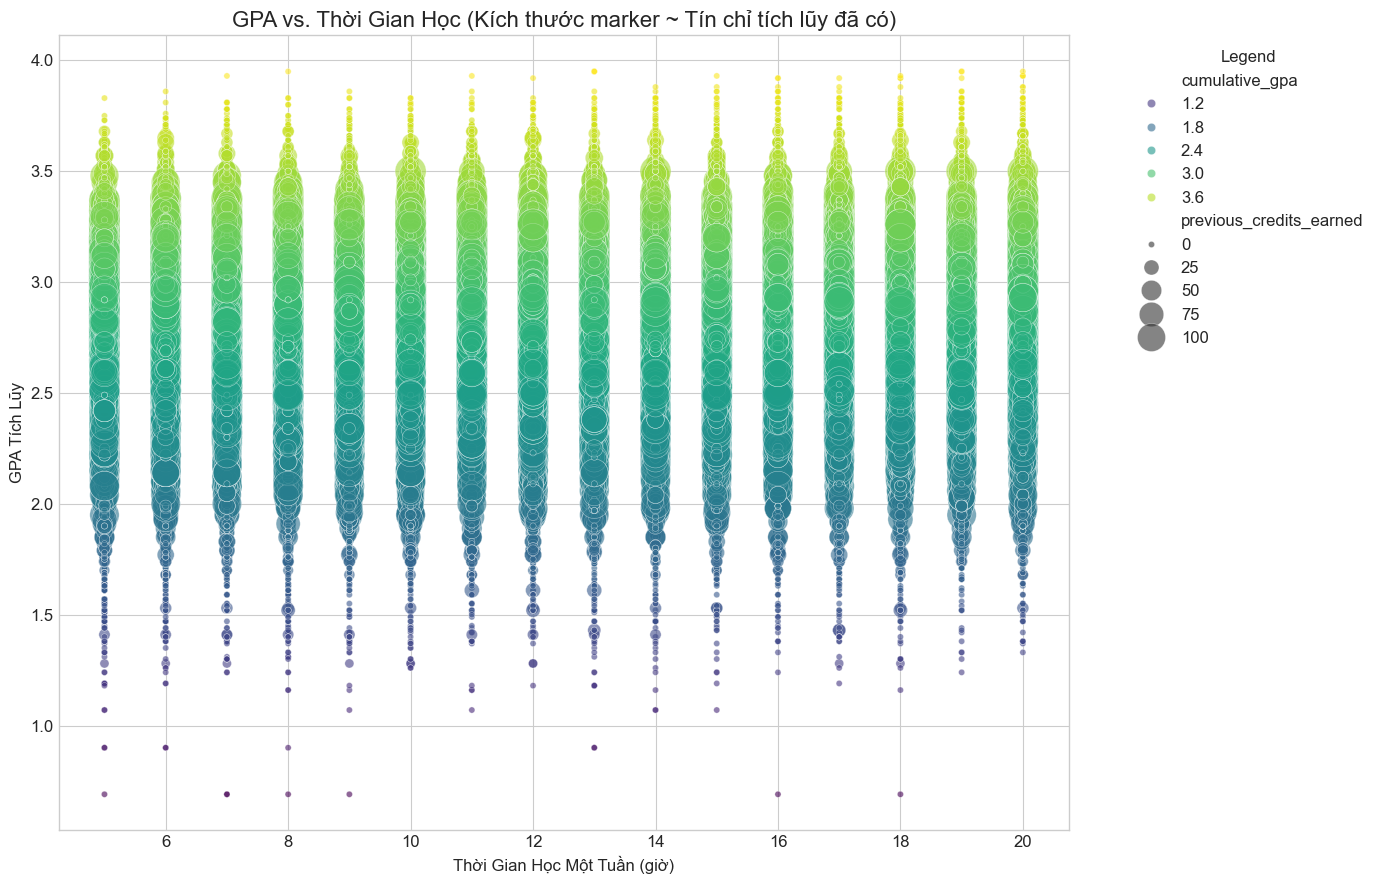

In [7]:
if df is not None:
    plt.figure(figsize=(14, 9))
    
    scatter = sns.scatterplot(
        data=df_processed,
        x='weekly_study_hours',
        y='cumulative_gpa',
        size='previous_credits_earned',
        sizes=(20, 500),
        alpha=0.6,
        hue='cumulative_gpa', 
        palette='viridis'
    )
    
    scatter.set_title('GPA vs. Thời Gian Học (Kích thước marker ~ Tín chỉ tích lũy đã có)', fontsize=16)
    scatter.set_xlabel('Thời Gian Học Một Tuần (giờ)')
    scatter.set_ylabel('GPA Tích Lũy')
    
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # --- LƯU BIỂU ĐỒ ---
    filename = 'scatter_gpa_vs_study_hours.png'
    filepath = os.path.join(PLOTS_DIR, filename)
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    print(f"Đã lưu biểu đồ vào: {filepath}")
    # --- HIỂN THỊ BIỂU ĐỒ ---
    plt.show()

Đã lưu biểu đồ vào: plots\point_gpa_by_family_support.png


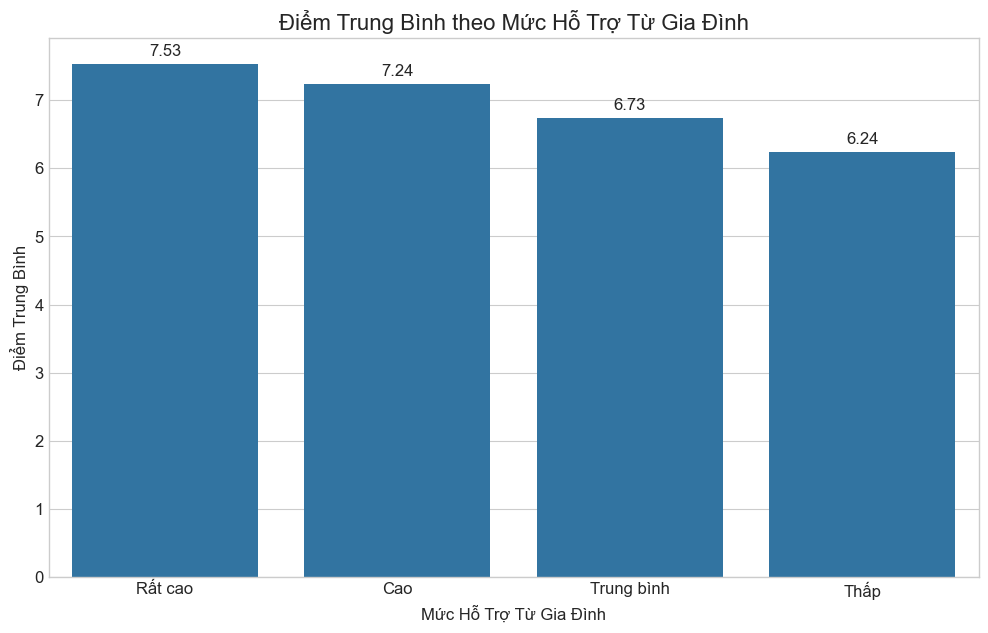

In [8]:
if df is not None:
    # Tính GPA trung bình theo mức độ hỗ trợ đã được mã hóa
    gpa_by_support = df_processed.groupby('family_support')['raw_score'].mean()
    
    # Tạo lại các nhãn chữ để hiển thị trên biểu đồ
    support_labels = {0: 'Thấp', 1: 'Trung bình', 2: 'Cao', 3: 'Rất cao'}
    gpa_by_support.index = gpa_by_support.index.map(support_labels)
    
    # Sắp xếp lại sau khi đã có nhãn
    gpa_by_support = gpa_by_support.sort_values(ascending=False)
    
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=gpa_by_support.index, y=gpa_by_support.values)
    
    # Hiển thị giá trị trên mỗi cột
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    
    ax.set_title('Điểm Trung Bình theo Mức Hỗ Trợ Từ Gia Đình', fontsize=16)
    ax.set_xlabel('Mức Hỗ Trợ Từ Gia Đình')
    ax.set_ylabel('Điểm Trung Bình')
    plt.xticks(rotation=0)

    # --- LƯU BIỂU ĐỒ ---
    filename = 'point_gpa_by_family_support.png'
    filepath = os.path.join(PLOTS_DIR, filename)
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    print(f"Đã lưu biểu đồ vào: {filepath}")
    # --- HIỂN THỊ BIỂU ĐỒ ---
    plt.show()

Đã lưu biểu đồ vào: plots\heatmap_correlation_matrix.png


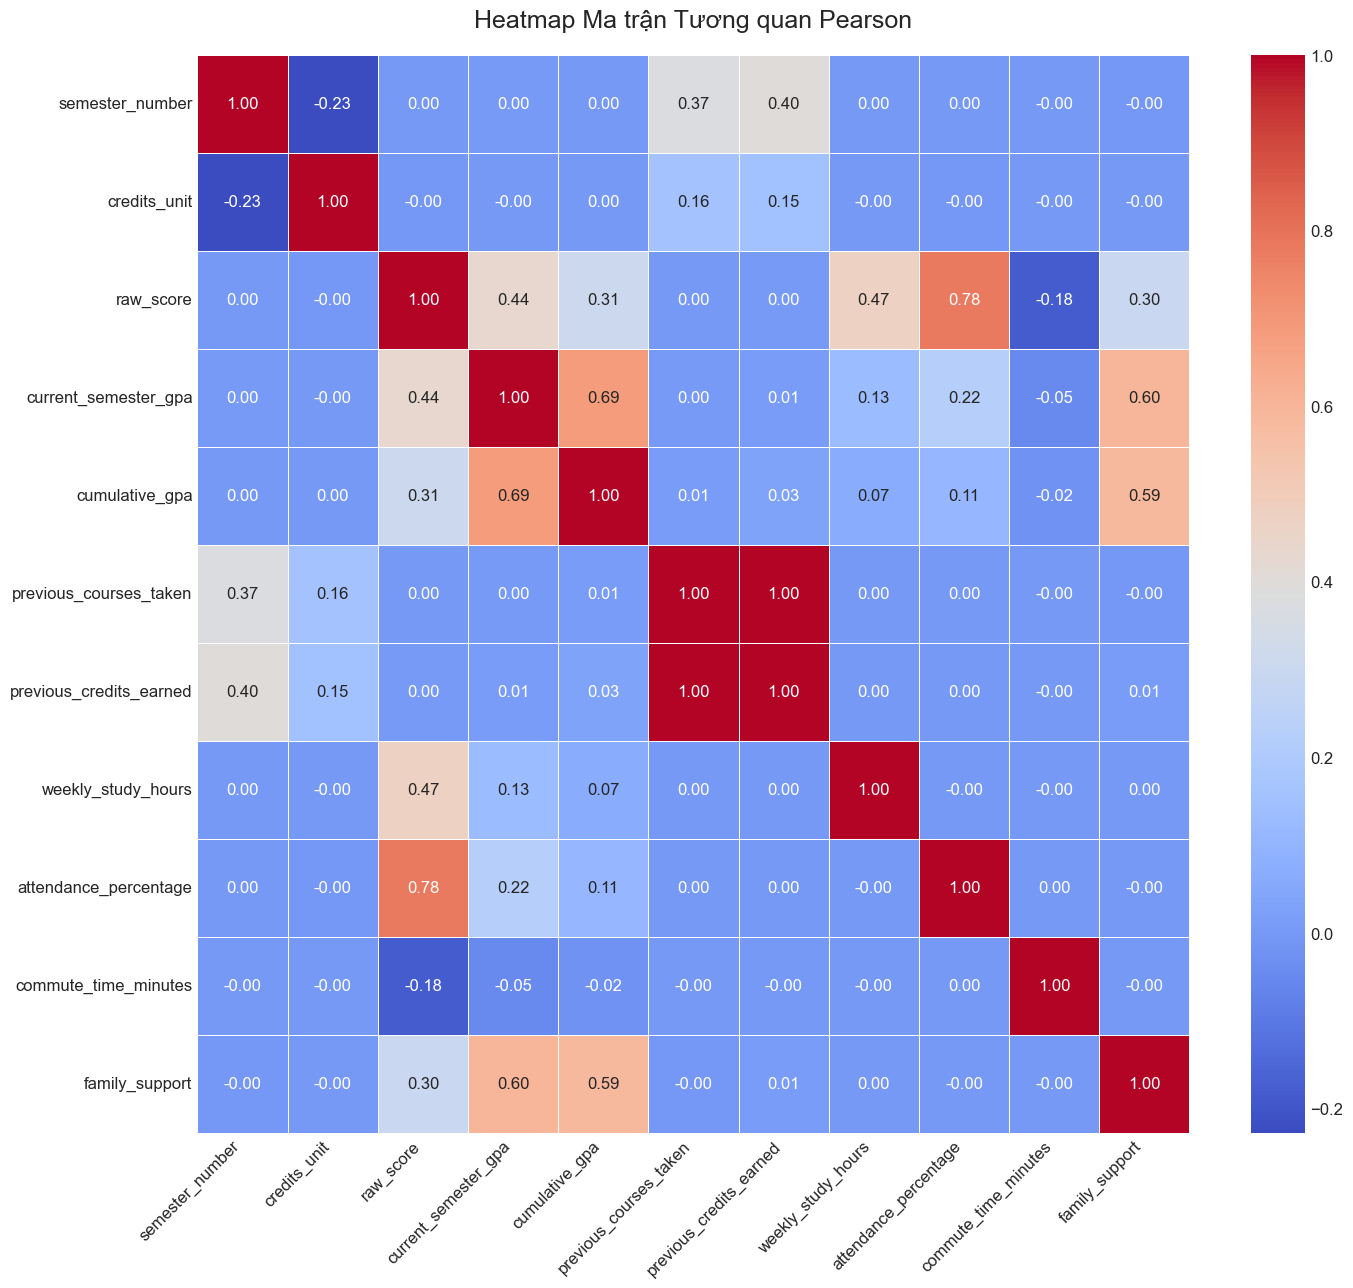

In [9]:
if df is not None:
    plt.figure(figsize=(16, 14))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Heatmap Ma trận Tương quan Pearson', fontsize=18, pad=20)
    plt.xticks(rotation=45, ha='right')
    
    filepath = os.path.join(PLOTS_DIR, 'heatmap_correlation_matrix.png')
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    print(f"Đã lưu biểu đồ vào: {filepath}")
    plt.show()

In [19]:
print("\n5 dòng đầu tiên trước khi feature engineering:")
display(df_processed.head())


5 dòng đầu tiên trước khi feature engineering:


,student_id,year,semester_number,course_code,study_format,credits_unit,raw_score,current_semester_gpa,cumulative_gpa,previous_courses_taken,previous_credits_earned,weekly_study_hours,attendance_percentage,commute_time_minutes,family_support
0,SV0001,2022-2023,1,CMU-SE 100,LEC,3,7.2,3.0,3.0,0,0,6,90.0,57,3
1,SV0001,2022-2023,1,CS 201,LEC,2,8.7,3.0,3.0,0,0,16,80.0,5,3
2,SV0001,2022-2023,1,CS 201,LAB,1,9.1,3.0,3.0,0,0,16,100.0,22,3
3,SV0001,2022-2023,1,CS 211,LEC,3,5.3,3.0,3.0,0,0,11,50.0,53,3
4,SV0001,2022-2023,1,CS 211,LAB,1,8.1,3.0,3.0,0,0,5,100.0,9,3


In [24]:
import pandas as pd
import numpy as np

def generate_features(df):
    df_eng = df.copy()
    print("Bắt đầu quá trình feature engineering…")

    # 1) INTERACTION FEATURES
    df_eng['attendance_percentage'] = pd.to_numeric(df_eng['attendance_percentage'], errors='coerce')

    df_eng['study_hours_x_attendance'] = (
        df_eng['weekly_study_hours'] * (df_eng['attendance_percentage'] / 100)
    )
    df_eng['attendance_x_support'] = (
        (df_eng['attendance_percentage'] / 100) * df_eng['family_support']
    )
    print("Tạo interaction features xong.")

    # 2) AGGREGATION PER STUDENT
    def _num_fails(series): return (series <= 3.9).sum()

    df_eng['std_score_per_student'] = df_eng.groupby('student_id')['raw_score'].transform('std')
    df_eng['total_courses'] = df_eng.groupby('student_id')['course_code'].transform('count')
    df_eng['num_failed_courses'] = df_eng.groupby('student_id')['raw_score'].transform(_num_fails)

    if 'subject_type' in df_eng.columns:
        df_eng['avg_score_by_subject_type'] = (
            df_eng.groupby(['student_id', 'subject_type'])['raw_score']
                  .transform('mean')
        )

    df_eng.sort_values(['student_id', 'year', 'semester_number'], inplace=True)
    df_eng['gpa_change_rate'] = (
        df_eng.groupby('student_id')['current_semester_gpa']
              .apply(lambda s: s.pct_change())
              .reset_index(level=0, drop=True)
    ).fillna(0)
    print("Tạo aggregation features theo sinh viên xong.")

    # 3) DOMAIN KNOWLEDGE
    subject_type_map = {
        'CMU-SE 100': 'major',
        'CS 201': 'general',
        'CS 211': 'major',
        'DTE-IS 102': 'major',
        'IS-ENG 136': 'major',
        'CHE 101': 'general',
        'CMU-CS 252': 'major',
        'CMU-CS 311': 'major',
        'DTE-IS 152': 'major',
        'IS-ENG 137': 'major',
        'IS-ENG 186': 'major',
        'MTH 103': 'general',
        'COM 141': 'general',
        'PHY 101': 'major',
        'CMU-CS 303': 'major',
        'CMU-SE 214': 'major',
        'HIS 222':'general',
        'IS-ENG 187': 'major',
        'IS-ENG 236': 'major',
        'MTH 104': 'general',
        'PHI 100': 'general',
        'CMU-CS 246': 'major',
        'CMU-CS 297': 'major',
        'CMU-CS 316': 'major',
        'CMU-ENG 130': 'major',
        'COM 142': 'general',
        'EVR 205': 'general',
        'MTH 254': 'major',
        'STA 151': 'general',
        'CMU-IS 432': 'major',
        'CMU-SE 252': 'major',
        'CMU-SE 303': 'major',
        'IS 301': 'major',
        'MTH 291': 'major',
        'PHI 150': 'general',
        'CMU-CS 445': 'major',
        'CMU-CS 447': 'major',
        'CMU-CS 462': 'major',
        'CMU-ENG 230': 'major',
        'CS 464': 'major',
        'MTH 203': 'general',
        'MTH 204': 'general',
        'MTH 341': 'major',
        'CMU-IS 401': 'major',
        'CS 466': 'major',
        'LAW 201': 'general',
        'POS 151': 'general',
        'POS 361': 'general',
    }

    difficulty_map = {
        'CMU-SE 100': 1,
        'CS 201': 1,
        'CS 211': 2,
        'DTE-IS 102': 1,
        'IS-ENG 136': 2,
        'CHE 101': 2,
        'CMU-CS 252': 1,
        'CMU-CS 311': 3,
        'DTE-IS 152': 1,
        'IS-ENG 137': 2,
        'IS-ENG 186': 2,
        'MTH 103': 3,
        'COM 141': 1,
        'PHY 101': 2,
        'CMU-CS 303': 3,
        'CMU-SE 214': 2,
        'HIS 222': 1,
        'IS-ENG 187': 2,
        'IS-ENG 236': 2,
        'MTH 104': 2,
        'PHI 100': 1,
        'CMU-CS 246': 2,
        'CMU-CS 297': 1,
        'CMU-CS 316': 3,
        'CMU-ENG 130': 2,
        'COM 142': 1,
        'EVR 205': 1,
        'MTH 254': 2,
        'STA 151': 1,
        'CMU-IS 432': 3,
        'CMU-SE 252': 3,
        'CMU-SE 303': 3,
        'IS 301': 3,
        'MTH 291': 2,
        'PHI 150': 1,
        'CMU-CS 445': 3,
        'CMU-CS 447': 2,
        'CMU-CS 462': 3,
        'CMU-ENG 230': 2,
        'CS 464': 3,
        'MTH 203': 2,
        'MTH 204': 2,
        'MTH 341': 2,
        'CMU-IS 401': 3,
        'CS 466': 3,
        'LAW 201': 1,
        'POS 151': 1,
        'POS 361': 1,
    }

    df_eng['subject_type'] = df_eng['course_code'].str.strip().map(subject_type_map)
    df_eng['expected_difficulty'] = df_eng['course_code'].str.strip().map(difficulty_map)

    # Cập nhật expected_score_hint theo đúng yêu cầu
    df_eng['expected_score_hint'] = np.where(
        (
            ((df_eng['subject_type'] == 'general') &
             (df_eng['attendance_percentage'] >= 85)) |
            ((df_eng['subject_type'] == 'major') &
             (df_eng['weekly_study_hours'] > 10) &
             (df_eng['expected_difficulty'] == 2) &
             (df_eng['attendance_percentage'] == 100))
        ), 1, 0
    )

    df_eng['general_easy_by_attendance'] = np.where(
        (df_eng['subject_type'] == 'general') &
        (df_eng['attendance_percentage'] >= 85),
        1, 0
    )

    df_eng['general_att_score_expect'] = np.where(
        (df_eng['subject_type'] == 'general') &
        (df_eng['attendance_percentage'] >= 90),
        8.5,
        5.0
    )

    df_eng['general_loyalty_score'] = np.where(
        (df_eng['subject_type'] == 'general'),
        df_eng['attendance_percentage'] / 100 - df_eng['weekly_study_hours'] / 20,
        0
    )
    print("Domain-knowledge features đã sinh xong.")

    # 4) FEATURE THEO SUBJECT TYPE
    df_eng['avg_attendance_by_subject_type'] = (
        df_eng.groupby(['student_id', 'subject_type'])['attendance_percentage']
              .transform('mean')
    )

    df_eng['fail_rate_general'] = (
        df_eng[df_eng['subject_type'] == 'general']
              .groupby('student_id')['raw_score']
              .transform(lambda x: (x < 3.9).mean())
    )

    df_eng['fail_rate_major'] = (
        df_eng[df_eng['subject_type'] == 'major']
              .groupby('student_id')['raw_score']
              .transform(lambda x: (x <= 3.9).mean())
    )

    att_gap = (
        df_eng.groupby(['student_id', 'subject_type'])['attendance_percentage']
              .mean().unstack()
    )
    att_gap['attendance_gap_general_vs_major'] = (
        att_gap.get('general', np.nan) - att_gap.get('major', np.nan)
    )
    df_eng = df_eng.merge(
        att_gap[['attendance_gap_general_vs_major']],
        left_on='student_id',
        right_index=True,
        how='left'
    )
    print("Thêm các đặc trưng theo subject_type.")

    # 5) CLEANUP
    cols_new = [
        'study_hours_x_attendance', 'attendance_x_support',
        'std_score_per_student', 'total_courses',
        'num_failed_courses', 'gpa_change_rate', 'expected_difficulty',
        'expected_score_hint', 'avg_attendance_by_subject_type',
        'fail_rate_general', 'fail_rate_major',
        'attendance_gap_general_vs_major',
        'general_easy_by_attendance', 'general_att_score_expect',
        'general_loyalty_score'
    ]

    df_eng['fail_rate_general'] = df_eng['fail_rate_general'].fillna(0)
    df_eng['fail_rate_major'] = df_eng['fail_rate_major'].fillna(0)
    df_eng.dropna(subset=cols_new, inplace=True)

    print(f"Feature engineering hoàn tất: {df_eng.shape[0]} dòng, {df_eng.shape[1]} cột.")
    return df_eng


In [25]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# Kiểm tra nếu biến đã tồn tại
if 'df_processed' in locals():
    print("\nTiến hành sinh đặc trưng từ df_processed...")
    df_featured = generate_features(df_processed)

    print("\nKIỂM TRA KẾT QUẢ ---")

    # Các cột quan trọng cần xem lại sau khi sinh đặc trưng
    preview_columns = [
        'student_id', 'course_code', 'weekly_study_hours',
        'attendance_percentage', 'family_support',
        'study_hours_x_attendance',
        'attendance_x_support',
        'subject_type',
        'expected_difficulty',
        'expected_score_hint',
        'general_easy_by_attendance',
        'general_att_score_expect',
        'general_loyalty_score',
        'avg_attendance_by_subject_type',
        'fail_rate_general',
        'fail_rate_major',
        'attendance_gap_general_vs_major',
        'gpa_change_rate',
        'num_failed_courses'
    ]

    # Chỉ hiển thị các cột có tồn tại trong DataFrame
    preview_columns_valid = [col for col in preview_columns if col in df_featured.columns]

    # Hiển thị bảng kết quả
    display(df_featured[preview_columns_valid].head())

    print(f"\nTổng số đặc trưng sau khi xử lý: {df_featured.shape[1]} cột")
    print(f"Số dòng dữ liệu hợp lệ: {df_featured.shape[0]} dòng")
else:
    print("Biến df_processed chưa tồn tại. Vui lòng kiểm tra lại.")



📌 Tiến hành sinh đặc trưng từ df_processed...
Bắt đầu quá trình feature engineering…
Tạo interaction features xong.


C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eng['std_score_per_student'] = df_eng.groupby('student_id')['raw_score'].transform('std')
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eng['total_courses'] = df_eng.groupby('student_id')['course_code'].transform('count')
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

Tạo aggregation features theo sinh viên xong.
Domain-knowledge features đã sinh xong.


C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eng.groupby(['student_id', 'subject_type'])['attendance_percentage']
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:186: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('student_id')['raw_score']
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:192: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

Thêm các đặc trưng theo subject_type.
Feature engineering hoàn tất: 295000 dòng, 31 cột.

✅ --- KIỂM TRA KẾT QUẢ ---


C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eng.groupby(['student_id', 'subject_type'])['attendance_percentage']


,student_id,course_code,weekly_study_hours,attendance_percentage,family_support,study_hours_x_attendance,attendance_x_support,subject_type,expected_difficulty,expected_score_hint,general_easy_by_attendance,general_att_score_expect,general_loyalty_score,avg_attendance_by_subject_type,fail_rate_general,fail_rate_major,attendance_gap_general_vs_major,gpa_change_rate,num_failed_courses
0,SV0001,CMU-SE 100,6,90.0,3,5.4,2.7,major,1,0,0,5.0,0.0,68.684211,0.0,0.0,13.696742,0.0,0
1,SV0001,CS 201,16,80.0,3,12.8,2.4,general,1,0,0,5.0,0.0,82.380952,0.0,0.0,13.696742,0.0,0
2,SV0001,CS 201,16,100.0,3,16.0,3.0,general,1,1,1,8.5,0.2,82.380952,0.0,0.0,13.696742,0.0,0
3,SV0001,CS 211,11,50.0,3,5.5,1.5,major,2,0,0,5.0,0.0,68.684211,0.0,0.0,13.696742,0.0,0
4,SV0001,CS 211,5,100.0,3,5.0,3.0,major,2,0,0,5.0,0.0,68.684211,0.0,0.0,13.696742,0.0,0



📊 Tổng số đặc trưng sau khi xử lý: 31 cột
📈 Số dòng dữ liệu hợp lệ: 295000 dòng


In [26]:
if 'df_processed' in locals():
    print("\n📌 Tiến hành sinh đặc trưng từ df_processed...")
    df_featured = generate_features(df_processed)

    # Kiểm tra trước khi mã hóa subject_type
    if 'subject_type' in df_featured.columns and df_featured['subject_type'].notna().any():
        subject_type_map_numeric = {'general': 1, 'major': 2}
        df_featured['subject_type'] = df_featured['subject_type'].map(subject_type_map_numeric)
    else:
        print("⚠️ Cảnh báo: subject_type không tồn tại hoặc toàn bộ là NaN – bỏ qua bước mã hóa.")

    # Danh sách các cột cần hiển thị (tùy chọn study_format)
    preview_columns = [
        'student_id', 'course_code', 'weekly_study_hours',
        'attendance_percentage', 'family_support',
        'study_hours_x_attendance',
        'attendance_x_support', 'subject_type',
        'study_format',  # chỉ giữ nếu có
        'expected_difficulty', 'expected_score_hint'
    ]

    # Lọc các cột có tồn tại
    preview_columns_valid = [col for col in preview_columns if col in df_featured.columns]

    print("\n✅ --- KIỂM TRA KẾT QUẢ ---")
    from IPython.display import display
    display(df_featured[preview_columns_valid].head())

    print(f"\n📊 Tổng số đặc trưng: {df_featured.shape[1]} cột")
    print(f"📈 Số dòng dữ liệu hợp lệ sau xử lý: {df_featured.shape[0]} dòng")
else:
    print("❌ Biến df_processed chưa tồn tại. Vui lòng kiểm tra lại.")



📌 Tiến hành sinh đặc trưng từ df_processed...
Bắt đầu quá trình feature engineering…
Tạo interaction features xong.


C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eng['std_score_per_student'] = df_eng.groupby('student_id')['raw_score'].transform('std')
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eng['total_courses'] = df_eng.groupby('student_id')['course_code'].transform('count')
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

Tạo aggregation features theo sinh viên xong.
Domain-knowledge features đã sinh xong.


C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eng.groupby(['student_id', 'subject_type'])['attendance_percentage']
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:186: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('student_id')['raw_score']
C:\Users\nguye\AppData\Local\Temp\ipykernel_30072\1818877394.py:192: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

Thêm các đặc trưng theo subject_type.
Feature engineering hoàn tất: 295000 dòng, 31 cột.

✅ --- KIỂM TRA KẾT QUẢ ---


,student_id,course_code,weekly_study_hours,attendance_percentage,family_support,study_hours_x_attendance,attendance_x_support,subject_type,study_format,expected_difficulty,expected_score_hint
0,SV0001,CMU-SE 100,6,90.0,3,5.4,2.7,2,LEC,1,0
1,SV0001,CS 201,16,80.0,3,12.8,2.4,1,LEC,1,0
2,SV0001,CS 201,16,100.0,3,16.0,3.0,1,LAB,1,1
3,SV0001,CS 211,11,50.0,3,5.5,1.5,2,LEC,2,0
4,SV0001,CS 211,5,100.0,3,5.0,3.0,2,LAB,2,0



📊 Tổng số đặc trưng: 31 cột
📈 Số dòng dữ liệu hợp lệ sau xử lý: 295000 dòng


In [27]:
if 'df_featured' in locals():
    output_filename = 'clean_student_data_v6.csv'
    df_featured.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"\nĐã lưu DataFrame cuối cùng thành công vào file '{output_filename}'.")
    print(f"Tổng số bản ghi trong file cuối cùng: {len(df_featured)}")


Đã lưu DataFrame cuối cùng thành công vào file 'clean_student_data_v6.csv'.
Tổng số bản ghi trong file cuối cùng: 295000


In [37]:
# Tạo thư mục lưu trữ biểu đồ nếu chưa tồn tại
PLOTS_DIR = 'plots_cleaned/'
os.makedirs(PLOTS_DIR, exist_ok=True)
print(f"Thư mục '{PLOTS_DIR}' đã sẵn sàng.")

# Tải dữ liệu đã được xử lý và feature engineering
try:
    df_featured = pd.read_csv('clean_student_data_v5.csv')
    print("Tải dữ liệu từ 'clean_student_data_v5.csv' thành công.")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'clean_student_data_v4.csv'.")
    print("Vui lòng đảm bảo file này tồn tại trong cùng thư mục với notebook.")
    df_featured = None

Thư mục 'plots_cleaned/' đã sẵn sàng.
Tải dữ liệu từ 'clean_student_data_v5.csv' thành công.


In [38]:
if df_featured is not None:
    print("5 dòng dữ liệu đầu tiên:")
    display(df_featured.head())
    
    print("\nThông tin các cột và kiểu dữ liệu:")
    df_featured.info()

5 dòng dữ liệu đầu tiên:


,student_id,year,semester_number,course_code,study_format,credits_unit,raw_score,current_semester_gpa,cumulative_gpa,previous_courses_taken,...,total_courses,num_failed_courses,gpa_change_rate,subject_type,expected_difficulty,expected_score_hint,avg_attendance_by_subject_type,fail_rate_general,fail_rate_major,attendance_gap_general_vs_major
0,SV0001,2022-2023,1,CMU-SE 100,LEC,3,7.2,3.0,3.0,0,...,59,0,0.0,2,1,0,68.684211,0.0,0.0,13.696742
1,SV0001,2022-2023,1,CS 201,LEC,2,8.7,3.0,3.0,0,...,59,0,0.0,1,1,0,82.380952,0.0,0.0,13.696742
2,SV0001,2022-2023,1,CS 201,LAB,1,9.1,3.0,3.0,0,...,59,0,0.0,1,1,1,82.380952,0.0,0.0,13.696742
3,SV0001,2022-2023,1,CS 211,LEC,3,5.3,3.0,3.0,0,...,59,0,0.0,2,2,0,68.684211,0.0,0.0,13.696742
4,SV0001,2022-2023,1,CS 211,LAB,1,8.1,3.0,3.0,0,...,59,0,0.0,2,2,0,68.684211,0.0,0.0,13.696742



Thông tin các cột và kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295000 entries, 0 to 294999
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   student_id                       295000 non-null  object 
 1   year                             295000 non-null  object 
 2   semester_number                  295000 non-null  int64  
 3   course_code                      295000 non-null  object 
 4   study_format                     295000 non-null  object 
 5   credits_unit                     295000 non-null  int64  
 6   raw_score                        295000 non-null  float64
 7   current_semester_gpa             295000 non-null  float64
 8   cumulative_gpa                   295000 non-null  float64
 9   previous_courses_taken           295000 non-null  int64  
 10  previous_credits_earned          295000 non-null  int64  
 11  weekly_study_hours           

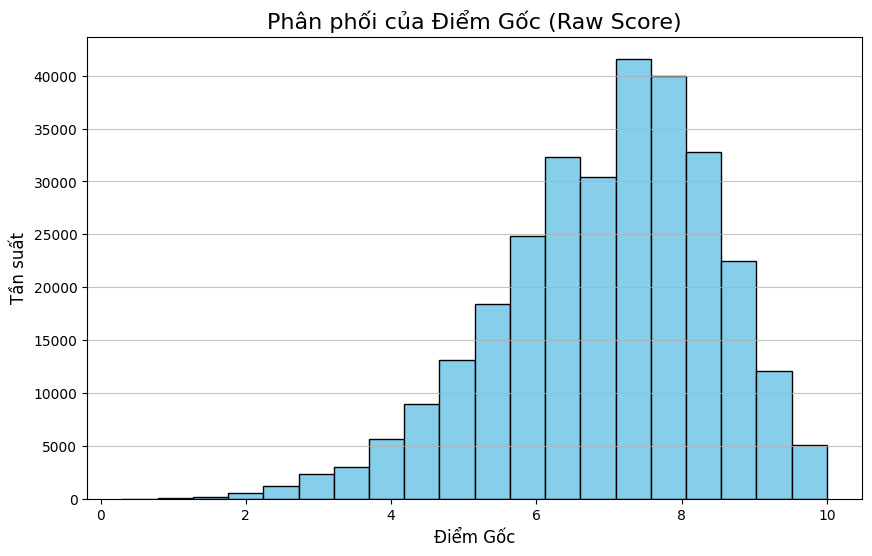

Đã lưu biểu đồ vào: plots_cleaned/raw_score_distribution.png


In [39]:
plt.style.use('default')
plt.figure(figsize=(10, 6))
df_featured['raw_score'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Phân phối của Điểm Gốc (Raw Score)', fontsize=16)
plt.xlabel('Điểm Gốc', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', alpha=0.75)

filepath = os.path.join(PLOTS_DIR, 'raw_score_distribution.png')
plt.savefig(filepath, dpi=150, bbox_inches='tight')
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

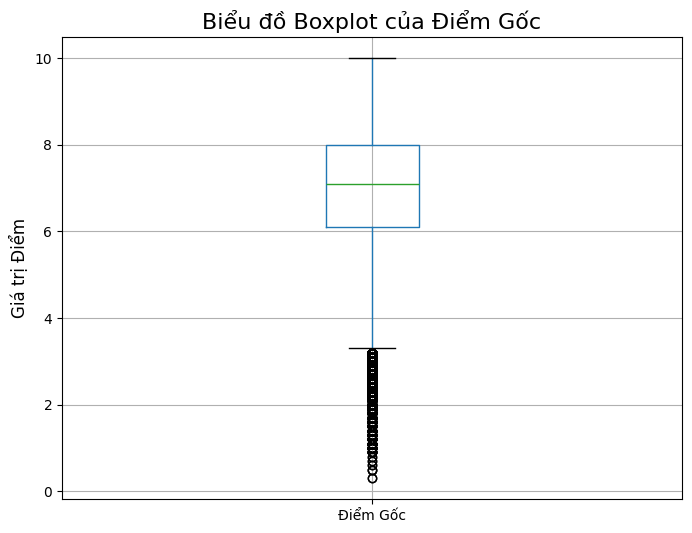

Đã lưu biểu đồ vào: plots_cleaned/raw_score_boxplot.png


In [40]:
plt.figure(figsize=(8, 6))
df_featured.boxplot(column=['raw_score'], grid=True)
plt.title('Biểu đồ Boxplot của Điểm Gốc', fontsize=16)
plt.ylabel('Giá trị Điểm', fontsize=12)
plt.xticks([1], ['Điểm Gốc'])

filepath = os.path.join(PLOTS_DIR, 'raw_score_boxplot.png')
plt.savefig(filepath, dpi=150, bbox_inches='tight')
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

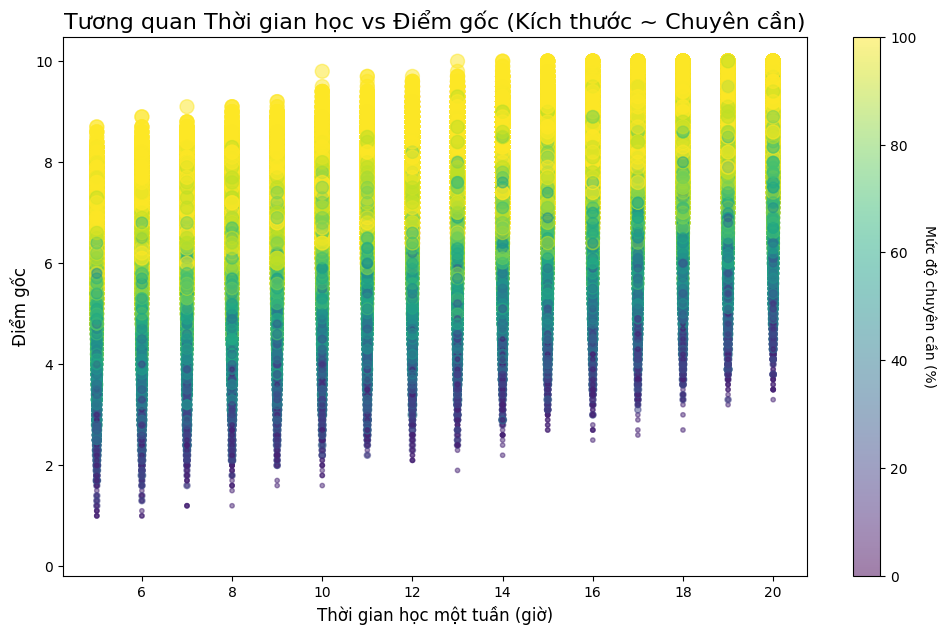

Đã lưu biểu đồ vào: plots_cleaned/study_vs_score.png


In [41]:
plt.figure(figsize=(12, 7))
# Chuyển đổi cột chuyên cần sang dạng số để làm kích thước
size = pd.to_numeric(df_featured['attendance_percentage'].astype(str).str.replace('%', ''), errors='coerce')
plt.scatter(df_featured['weekly_study_hours'], df_featured['raw_score'], alpha=0.5, c=size, cmap='viridis', s=size)
plt.title('Tương quan Thời gian học vs Điểm gốc (Kích thước ~ Chuyên cần)', fontsize=16)
plt.xlabel('Thời gian học một tuần (giờ)', fontsize=12)
plt.ylabel('Điểm gốc', fontsize=12)
cbar = plt.colorbar()
cbar.set_label('Mức độ chuyên cần (%)', rotation=270, labelpad=15)

filepath = os.path.join(PLOTS_DIR, 'study_vs_score.png')
plt.savefig(filepath, dpi=150, bbox_inches='tight')
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

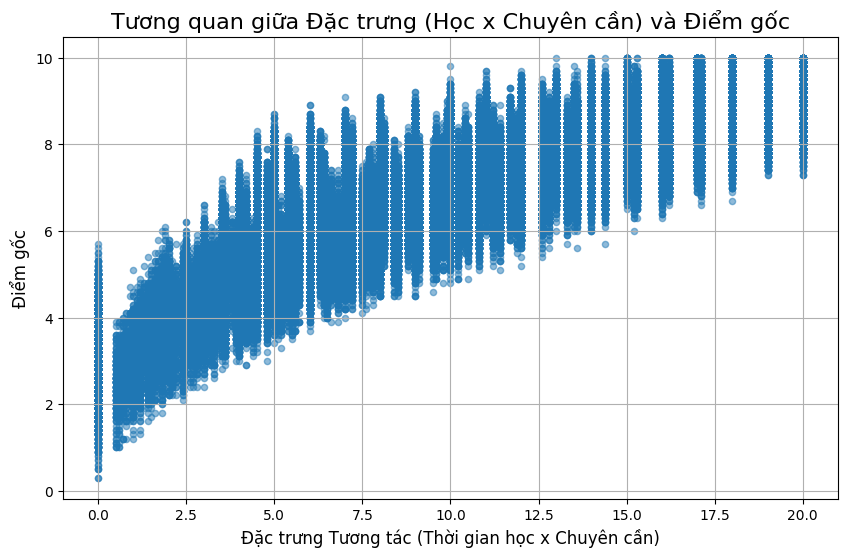

Đã lưu biểu đồ vào: plots_cleaned/study_attendance_interaction.png


In [42]:
df_featured.plot(kind='scatter', x='study_hours_x_attendance', y='raw_score', alpha=0.5, figsize=(10, 6))
plt.title('Tương quan giữa Đặc trưng (Học x Chuyên cần) và Điểm gốc', fontsize=16)
plt.xlabel('Đặc trưng Tương tác (Thời gian học x Chuyên cần)', fontsize=12)
plt.ylabel('Điểm gốc', fontsize=12)
plt.grid(True)

filepath = os.path.join(PLOTS_DIR, 'study_attendance_interaction.png')
plt.savefig(filepath, dpi=150, bbox_inches='tight')
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

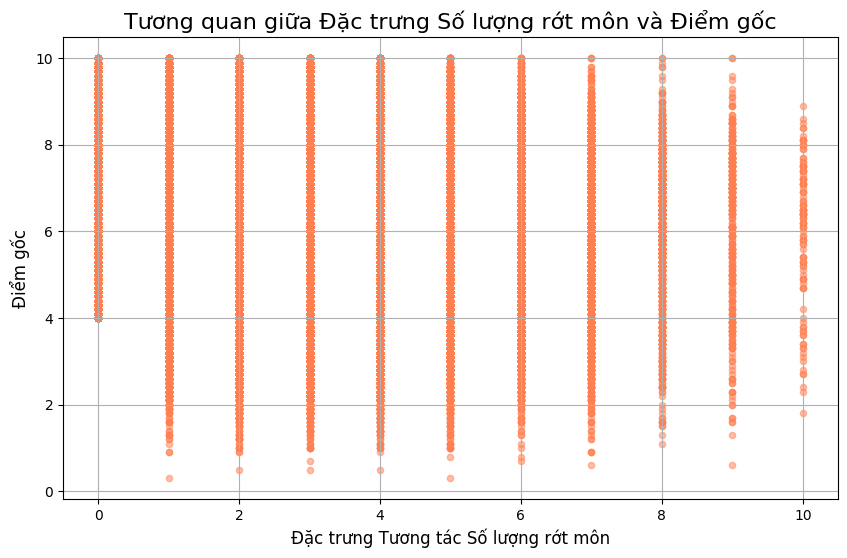

Đã lưu biểu đồ vào: plots_cleaned/points_interaction.png


In [43]:
df_featured.plot(kind='scatter', x='num_failed_courses', y='raw_score', alpha=0.5, figsize=(10, 6), c='coral')
plt.title('Tương quan giữa Đặc trưng Số lượng rớt môn và Điểm gốc', fontsize=16)
plt.xlabel('Đặc trưng Tương tác Số lượng rớt môn', fontsize=12)
plt.ylabel('Điểm gốc', fontsize=12)
plt.grid(True)

filepath = os.path.join(PLOTS_DIR, 'points_interaction.png')
plt.savefig(filepath, dpi=150, bbox_inches='tight')
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

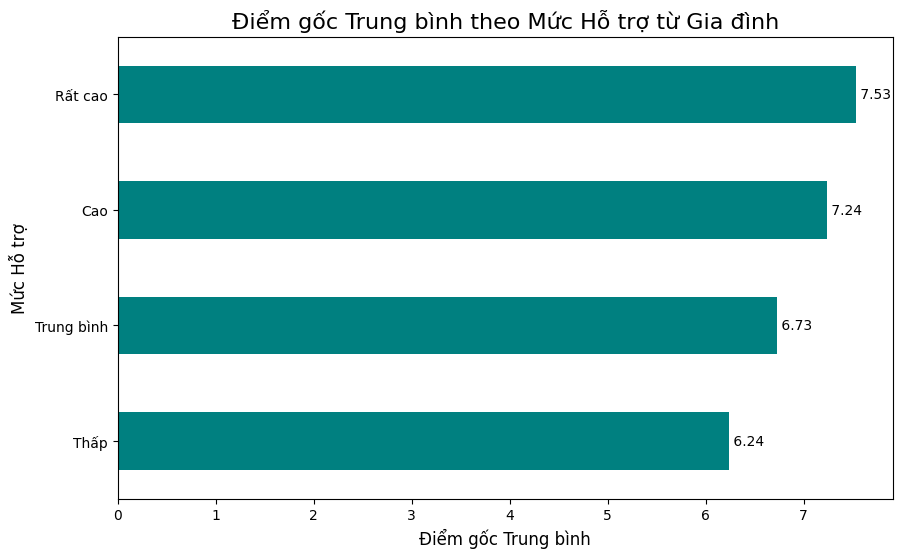

Đã lưu biểu đồ vào: plots_cleaned/avg_score_by_family_support.png


In [44]:
avg_score_by_support = df_featured.groupby('family_support')['raw_score'].mean()
support_labels = {0: 'Thấp', 1: 'Trung bình', 2: 'Cao', 3: 'Rất cao'}
avg_score_by_support.index = avg_score_by_support.index.map(support_labels)
ax = avg_score_by_support.sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Điểm gốc Trung bình theo Mức Hỗ trợ từ Gia đình', fontsize=16)
plt.xlabel('Điểm gốc Trung bình', fontsize=12)
plt.ylabel('Mức Hỗ trợ', fontsize=12)
for index, value in enumerate(avg_score_by_support.sort_values()):
    ax.text(value, index, f' {value:.2f}', va='center')

filepath = os.path.join(PLOTS_DIR, 'avg_score_by_family_support.png')
plt.savefig(filepath, dpi=150, bbox_inches='tight')
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

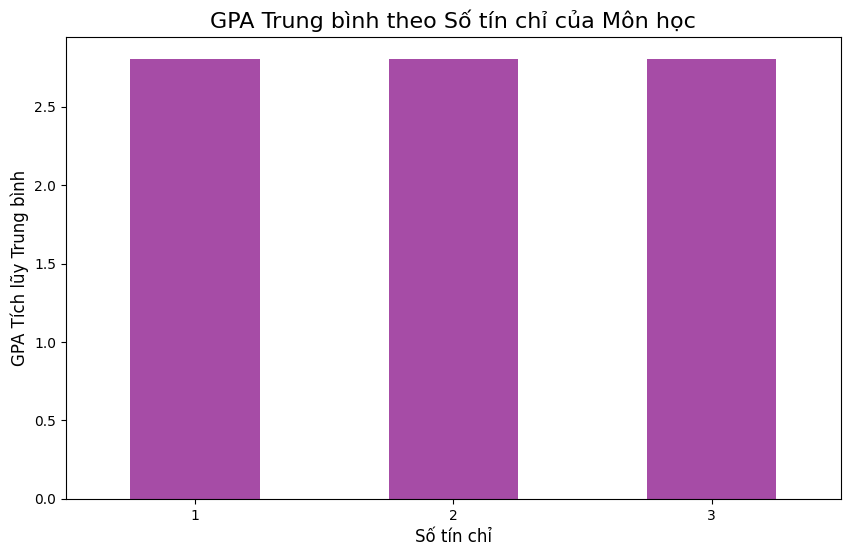

Đã lưu biểu đồ vào: plots_cleaned/avg_gpa_by_course_load.png


In [20]:
avg_gpa_by_credits = df_featured.groupby('credits_unit')['cumulative_gpa'].mean()
ax = avg_gpa_by_credits.plot(kind='bar', figsize=(10, 6), color='purple', alpha=0.7)
plt.title('GPA Trung bình theo Số tín chỉ của Môn học', fontsize=16)
plt.xlabel('Số tín chỉ', fontsize=12)
plt.ylabel('GPA Tích lũy Trung bình', fontsize=12)
plt.xticks(rotation=0)

filepath = os.path.join(PLOTS_DIR, 'avg_gpa_by_course_load.png')
plt.savefig(filepath, dpi=150, bbox_inches='tight')
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

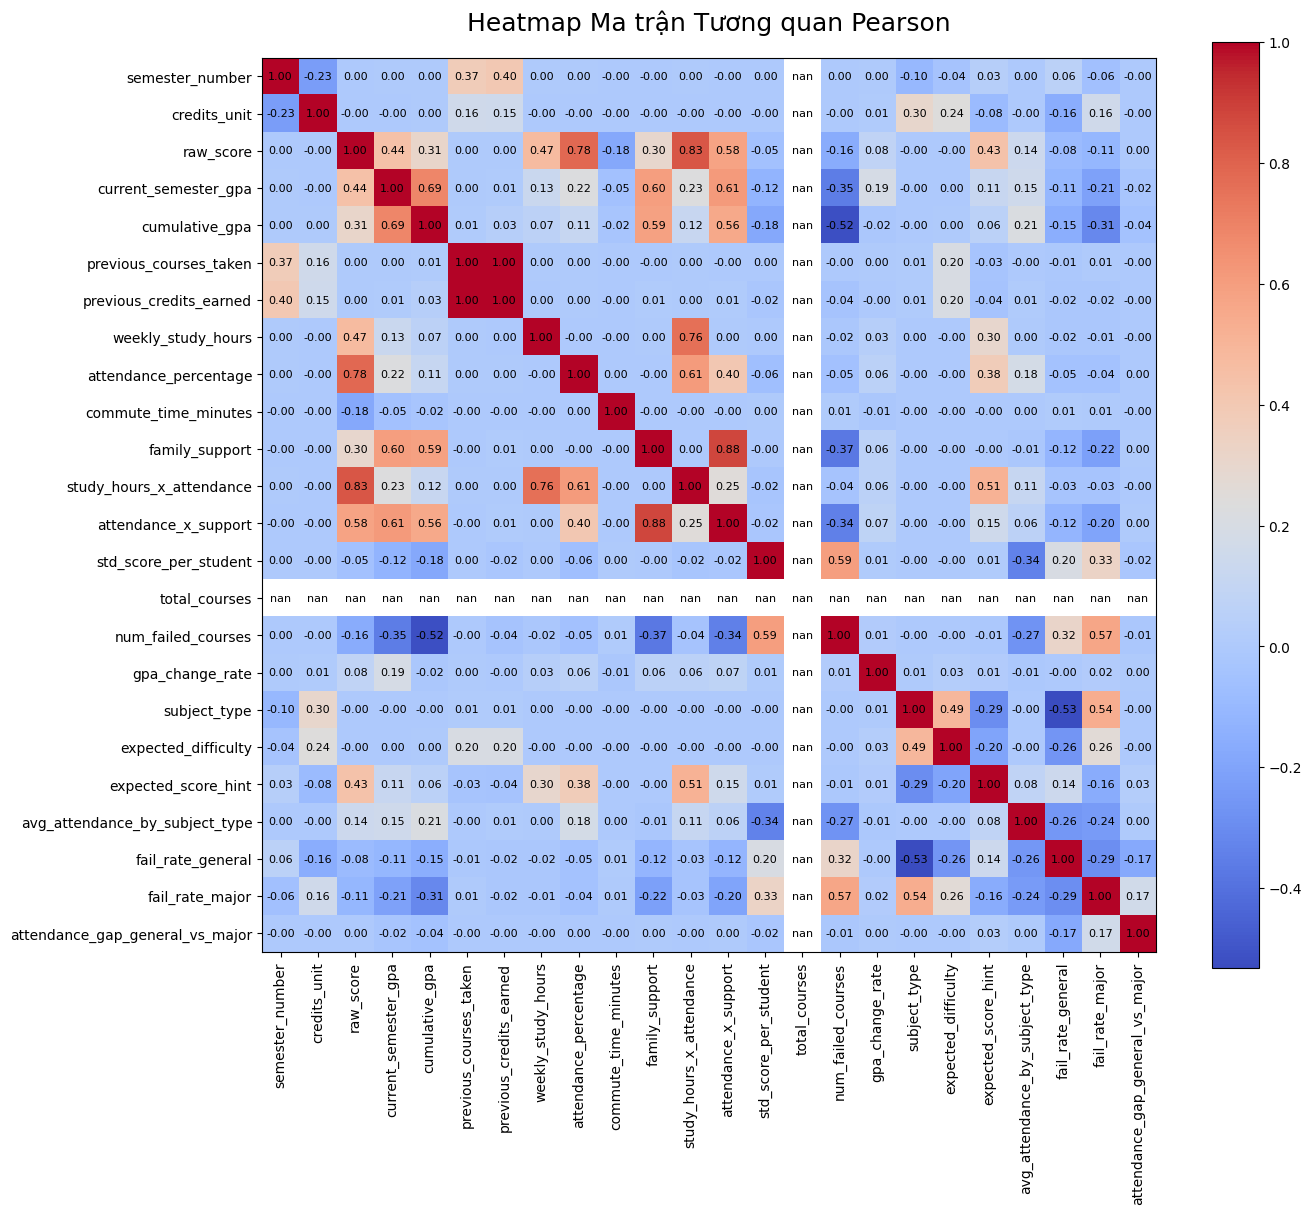

Đã lưu biểu đồ vào: plots_cleaned/correlation_heatmap.png


In [45]:
# Lấy các cột số để tính tương quan
numeric_df = df_featured.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
cax = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(cax)

# Thêm giá trị vào ô
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=8)

plt.title('Heatmap Ma trận Tương quan Pearson', fontsize=18, pad=20)
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.tight_layout()

filepath = os.path.join(PLOTS_DIR, 'correlation_heatmap.png')
plt.savefig(filepath, dpi=150)
plt.show()
print(f"Đã lưu biểu đồ vào: {filepath}")

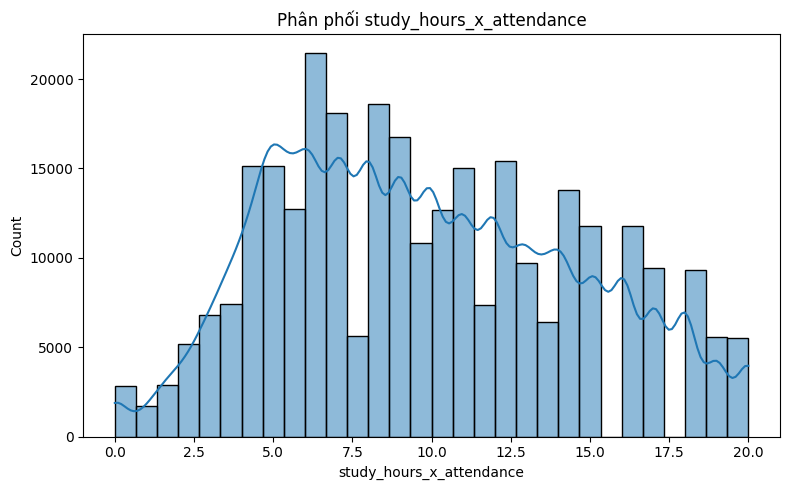

In [46]:
# Histogram: study_hours_x_attendance
plt.figure(figsize=(8, 5))
sns.histplot(df_featured['study_hours_x_attendance'], kde=True, bins=30)
plt.title('Phân phối study_hours_x_attendance')
plt.xlabel('study_hours_x_attendance')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'hist_study_hours_x_attendance.png'))
plt.show()

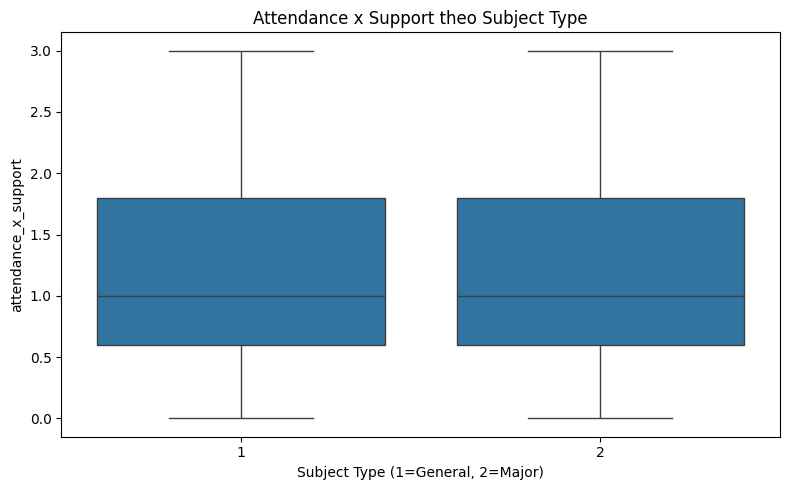

In [10]:
# Boxplot: attendance_x_support theo subject_type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_featured, x='subject_type', y='attendance_x_support')
plt.title('Attendance x Support theo Subject Type')
plt.xlabel('Subject Type (1=General, 2=Major)')
plt.ylabel('attendance_x_support')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'box_attendance_x_support_by_subject_type.png'))
plt.show()

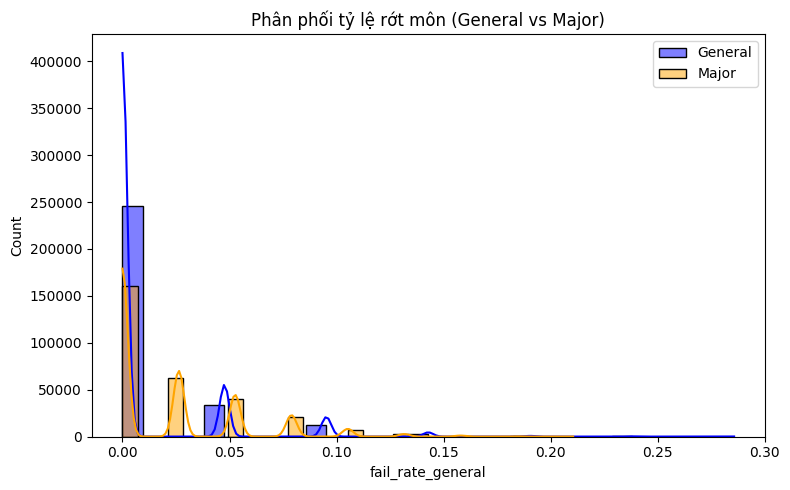

In [47]:
# Histogram: fail_rate_general vs fail_rate_major
plt.figure(figsize=(8, 5))
sns.histplot(df_featured['fail_rate_general'], color='blue', label='General', kde=True, bins=30)
sns.histplot(df_featured['fail_rate_major'], color='orange', label='Major', kde=True, bins=30)
plt.title('Phân phối tỷ lệ rớt môn (General vs Major)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'hist_fail_rate_general_vs_major.png'))
plt.show()

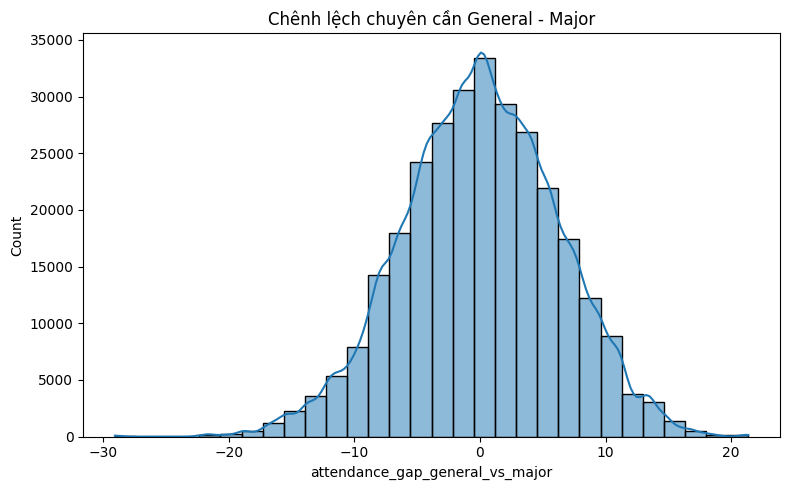

In [48]:
# Histogram: attendance_gap_general_vs_major
plt.figure(figsize=(8, 5))
sns.histplot(df_featured['attendance_gap_general_vs_major'], kde=True, bins=30)
plt.title('Chênh lệch chuyên cần General - Major')
plt.xlabel('attendance_gap_general_vs_major')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'hist_attendance_gap.png'))
plt.show()

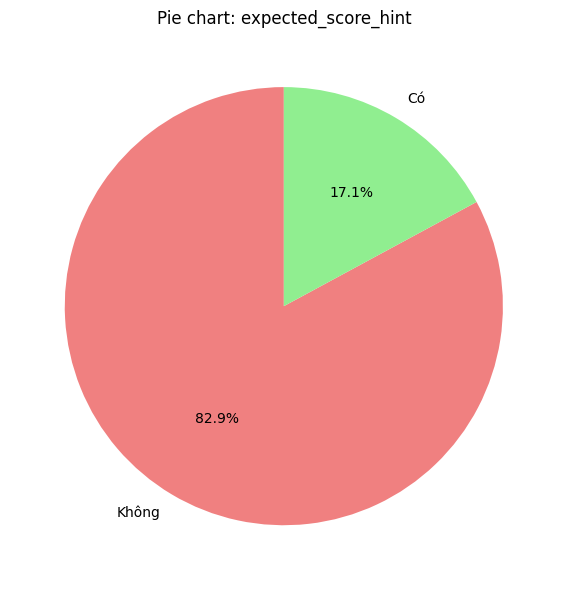

In [49]:
# 5. expected_score_hint → Pie chart
plt.figure(figsize=(6, 6))
counts = df_featured['expected_score_hint'].value_counts()
plt.pie(counts, labels=['Không', 'Có'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Pie chart: expected_score_hint')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'pie_expected_score_hint.png'))
plt.show()

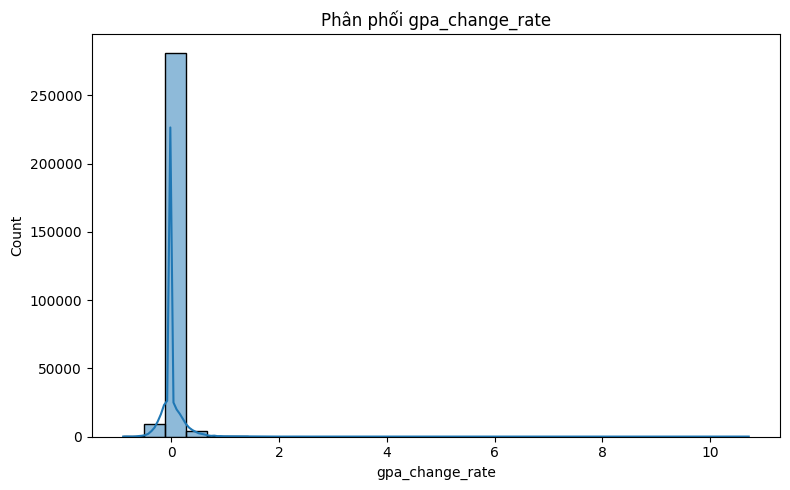

In [50]:
# Histogram: gpa_change_rate
plt.figure(figsize=(8, 5))
sns.histplot(df_featured['gpa_change_rate'].dropna(), kde=True, bins=30)
plt.title('Phân phối gpa_change_rate')
plt.xlabel('gpa_change_rate')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'hist_gpa_change_rate.png'))
plt.show()